In [59]:
import sqlite3

In [61]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [63]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [65]:
sales_data = [
    ('Eggplant', 10, 2.5),
    ('Tomato', 5, 1.2),
    ('Eggplant', 15, 2.5),
    ('Onion', 8, 3.0),
    ('Tomato', 12, 1.2),
    ('Onion', 10, 3.0),
]

In [67]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", 
                   sales_data)

In [69]:
conn.commit()
conn.close()

In [71]:
print("Database created and data inserted.")

Database created and data inserted.


In [73]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
conn = sqlite3.connect("sales_data.db")

In [77]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [79]:
df = pd.read_sql_query(query, conn)

In [81]:
conn.close()

In [83]:
print("Basic Sales Summary:")
print(df)

Basic Sales Summary:
    product  total_qty  revenue
0  Eggplant         25     62.5
1     Onion         18     54.0
2    Tomato         17     20.4


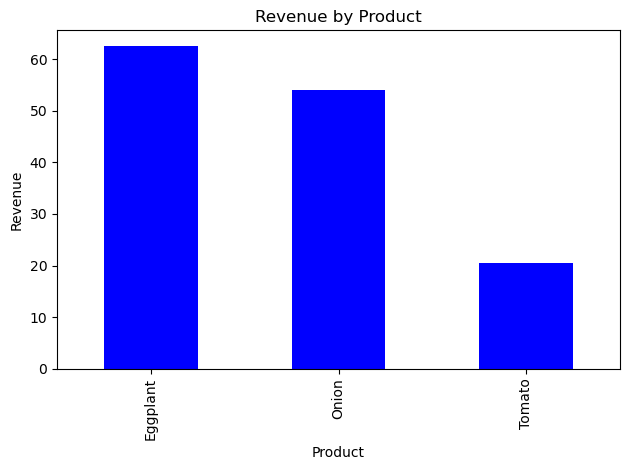

In [85]:
df.plot(kind='bar', x='product', y='revenue', color='Blue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()